# Sumário

<ul>
    <li>0.0. Imports</li> 
    <ul>
        <li>0.1. Funções Auxiiares</li>
        <li>0.2. Carregando Dados</li>
    </ul>
    <li>1.0. Descrição dos Dados</li> 
    <ul>
        <li>1.1. Dimensão dos Dados</li>
        <li>1.2. Tipo dos Dados</li>
        <li>1.3. Verificar NA</li> 
        <li>1.4. Mudar o Tipo da Variável</li>
        <li>1.5. Estatística Descritiva</li>
        <ul>
            <li>1.5.1. Atributos Numéricos</li>
        </ul>
    </ul>
    <ul>
       <li>2.0. Feature Engineering</li>
       <li>2.1. Mapa Mental de Hipóteses</li>
       <li>2.2. Criação das Hipóteses</li> 
       <ul> 
           <li>2.2.1. Hipóteses Tempo</li>
           <li>2.2.2. Hipóteses Imóveis </li>
           <li>2.2.3. Hipóteses Localização </li>
       </ul>
       <li>2.3. Lista Final de Hipóteses </li>
       <li>2.4. Feature Engineering</li> 
       <li>3.0. Filtragem de Variáveis</li>
       <ul> 
           <li>3.1. Seleção das Colunas</li>
       </ul>  
       <li>4.0. Análise Exploratória dos Dados </li>
       <ul>
           <li>4.1. Análise Univariada</li> 
           <ul>
               <li>4.1.1. Variável Resposta</li> 
               <li>4.1.2. Variáveis Numéricas</li>
           </ul>
           <li>4.2. Análise Bivariada</li>  
       </ul>    
    </ul>
</ul>

# 0.0. Imports

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from IPython.display      import Image
from IPython.core.display import HTML

## 0.1. Funções Auxiliares

In [128]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container {width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr',False )
    
    sns.set()

In [129]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Carregando Dados

In [130]:
df_kc_house = pd.read_csv('data/kc_house_data.csv')

# 1.0. Descrição dos Dados

In [131]:
df1 = df_kc_house.copy()

## 1.1. Dimensão dos Dados

In [132]:
print('Número de Linhas: {}'.format(df1.shape[0]))
print('Número de Colunas: {}'.format(df1.shape[1]))

Número de Linhas: 21613
Número de Colunas: 21


## 1.2. Tipo dos Dados

In [133]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 1.3. Verificar NA

In [134]:
df1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4. Mudar o Tipo da Variável

In [135]:
df1['date'] = pd.to_datetime( df1['date'] )
df1['bathrooms'] = df1.bathrooms.astype( 'int64' )

## 1.5. Estatística Descritiva

In [136]:
num_atributos = df1.select_dtypes( include=['int64', 'float64'] )

### 1.5.1. Atributos Numéricos

In [137]:
# Tendencia Centra - mean, median
ct1 = pd.DataFrame( num_atributos.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_atributos.apply( np.median ) ).T

# Dispersão - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_atributos.apply( np.std ) ).T
d2 = pd.DataFrame( num_atributos.apply( min ) ).T
d3 = pd.DataFrame( num_atributos.apply( max ) ).T
d4 = pd.DataFrame( num_atributos.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_atributos.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_atributos.apply( lambda x: x.kurtosis() ) ).T

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [138]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.000102e+06,9.900000e+09,9.899000e+09,4.580302e+09,3.904930e+09,2.876499e+09,0.243329,-1.260542
1,price,7.500000e+04,7.700000e+06,7.625000e+06,5.400881e+05,4.500000e+05,3.671187e+05,4.024069,34.585540
2,bedrooms,0.000000e+00,3.300000e+01,3.300000e+01,3.370842e+00,3.000000e+00,9.300403e-01,1.974300,49.063653
3,bathrooms,0.000000e+00,8.000000e+00,8.000000e+00,1.749734e+00,2.000000e+00,7.348561e-01,0.902105,1.989574
4,sqft_living,2.900000e+02,1.354000e+04,1.325000e+04,2.079900e+03,1.910000e+03,9.184196e+02,1.471555,5.243093
5,sqft_lot,5.200000e+02,1.651359e+06,1.650839e+06,1.510697e+04,7.618000e+03,4.141955e+04,13.060019,285.077820
6,floors,1.000000e+00,3.500000e+00,2.500000e+00,1.494309e+00,1.500000e+00,5.399764e-01,0.616177,-0.484723
7,waterfront,0.000000e+00,1.000000e+00,1.000000e+00,7.541757e-03,0.000000e+00,8.651520e-02,11.385108,127.632494
8,view,0.000000e+00,4.000000e+00,4.000000e+00,2.343034e-01,0.000000e+00,7.662998e-01,3.395750,10.893022
9,condition,1.000000e+00,5.000000e+00,4.000000e+00,3.409430e+00,3.000000e+00,6.507280e-01,1.032805,0.525764


# 2.0. Feature Engineering

In [139]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipóteses

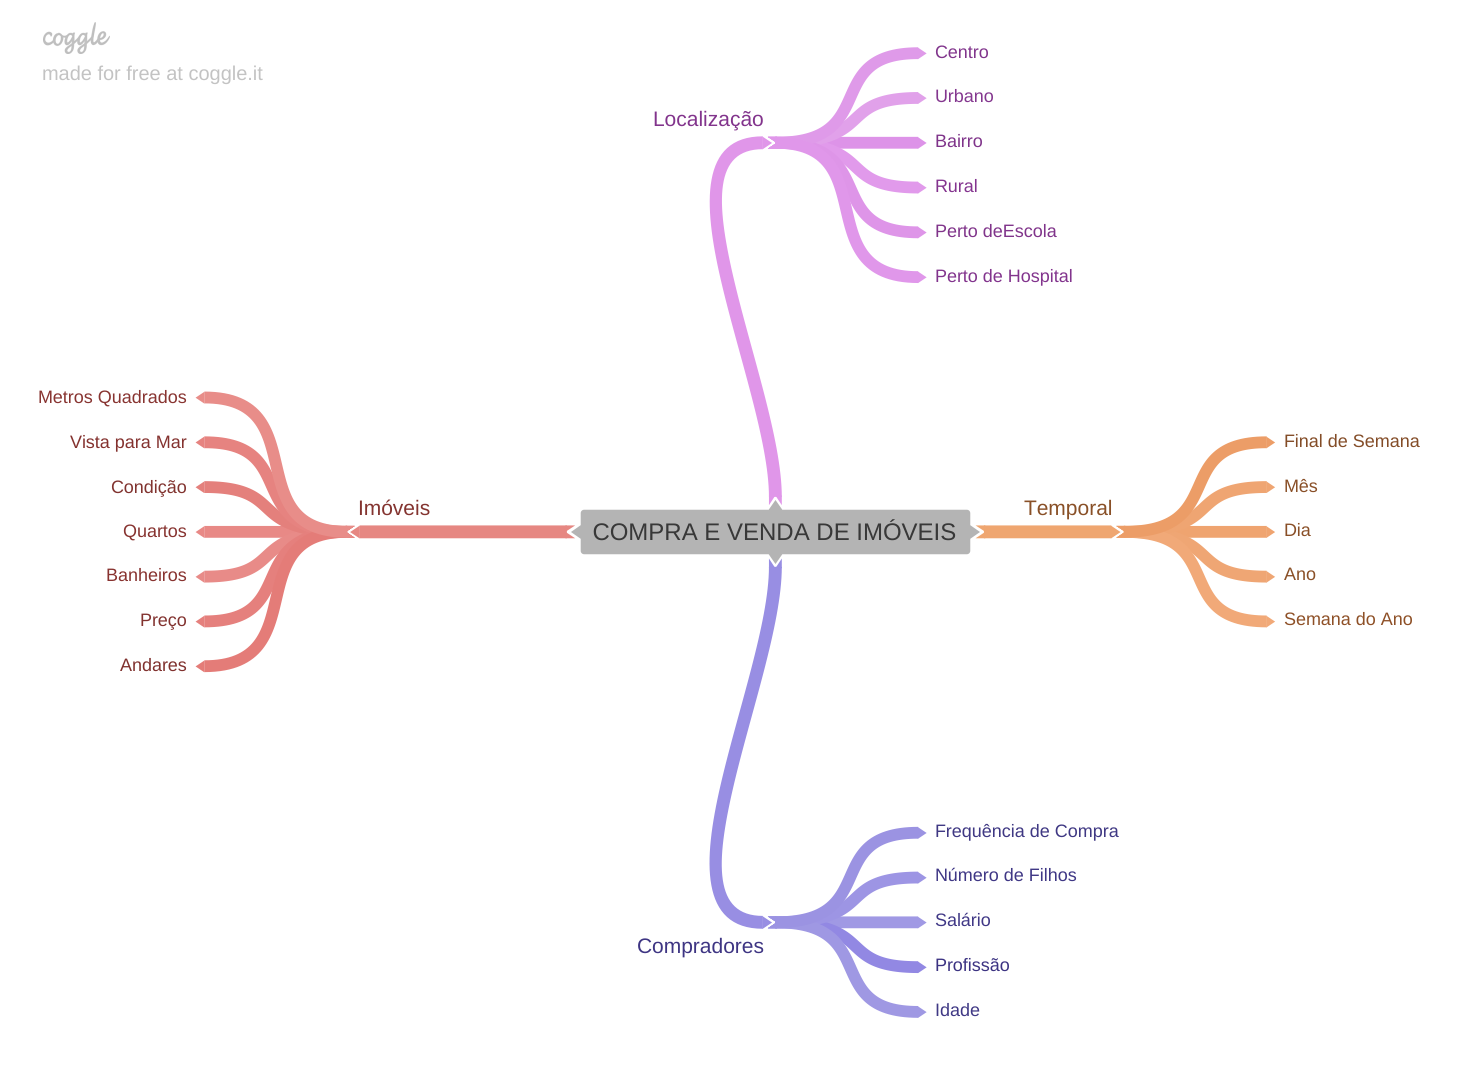

In [140]:
Image( 'imagens/COMPRA_E_VENDA_DE_IMVEIS.png' )

## 2.2. Criação das Hipóteses

### 2.2.1. Hipóteses Tempo

**1.** Imóveis vendem mais ao longo dos anos.

**2.** Imóveis vendem mais no segundo semestre do ano.

**3.** Imóveis vendem mais depois do dia 10 de cada mês.

**4.** Imóveis vendem menos aos finais de semana.

### 2.2.2. Hipóteses Imóveis 

**1.** Imóveis com preço menor, vendem mais.

**2.** Imóveis com vista para o mar, vendem mais.

**3.** Imóveis com mais quartos, vendem mais.

**4.** Imóveis com mais andares, vendem mais.

**5.** Imóveis com mais banheiros, vendem mais.

**6.** Imóveis com melhores condições, vendem mais.

**7.** Imóveis com mais metros quadrados, vendem mais.

### 2.2.3. Hipóteses Localização

**1.** Imóveis localizado no centro de cidade vendem mais.

**2.** Imóveis localizado perto de escola vendem mais.

**3.** Imóveis localizado perto de hospitais vendem mais.

**4.** Imóveis localizado no meio urbano vendem mais. 

**5.** Imóveis localizado no meio rural vendem menos.

**6.** Imóveis localizado em bairros de classe média vendem mais.

## 2.3. Lista Final de Hipóteses

**1.** Imóveis vendem mais ao longo dos anos.

**2.** Imóveis vendem mais no segundo semestre do ano.

**3.** Imóveis vendem mais depois do dia 10 de cada mês.

**4.** Imóveis vendem menos aos finais de semana.

**5.** Imóveis com vista para o mar, vendem mais.

**6.** Imóveis com mais quartos, vendem mais.

**7.** Imóveis com mais andares, vendem mais.

**8.** Imóveis com mais banheiros, vendem mais.

**9.** Imóveis com melhores condições, vendem mais.

**10.** Imóveis com mais metros quadrados, vendem mais.

## 2.4. Feature Engineering

In [141]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of yaer
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# day of week
df2['day_of_week'] = df2['date'].dt.dayofweek # Observe que o dia da semana começa em 0 -> Segunda-feira

In [142]:
df2.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,2014-10-13 00:00:00,2014-12-09 00:00:00,2015-02-25 00:00:00,2014-12-09 00:00:00,2015-02-18 00:00:00
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1,2,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


# 3.0. Filtragem de Variáveis

In [143]:
df3 = df2.copy()

## 3.1. Seleção das Colunas

In [144]:
cols_drop = ['grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']
df3 = df3.drop( cols_drop, axis=1 )

# 4.0. Análise Exploratória dos Dados

In [145]:
df4 = df3.copy()

## 4.1. Análise Univariada

### 4.1.1. Variável Resposta

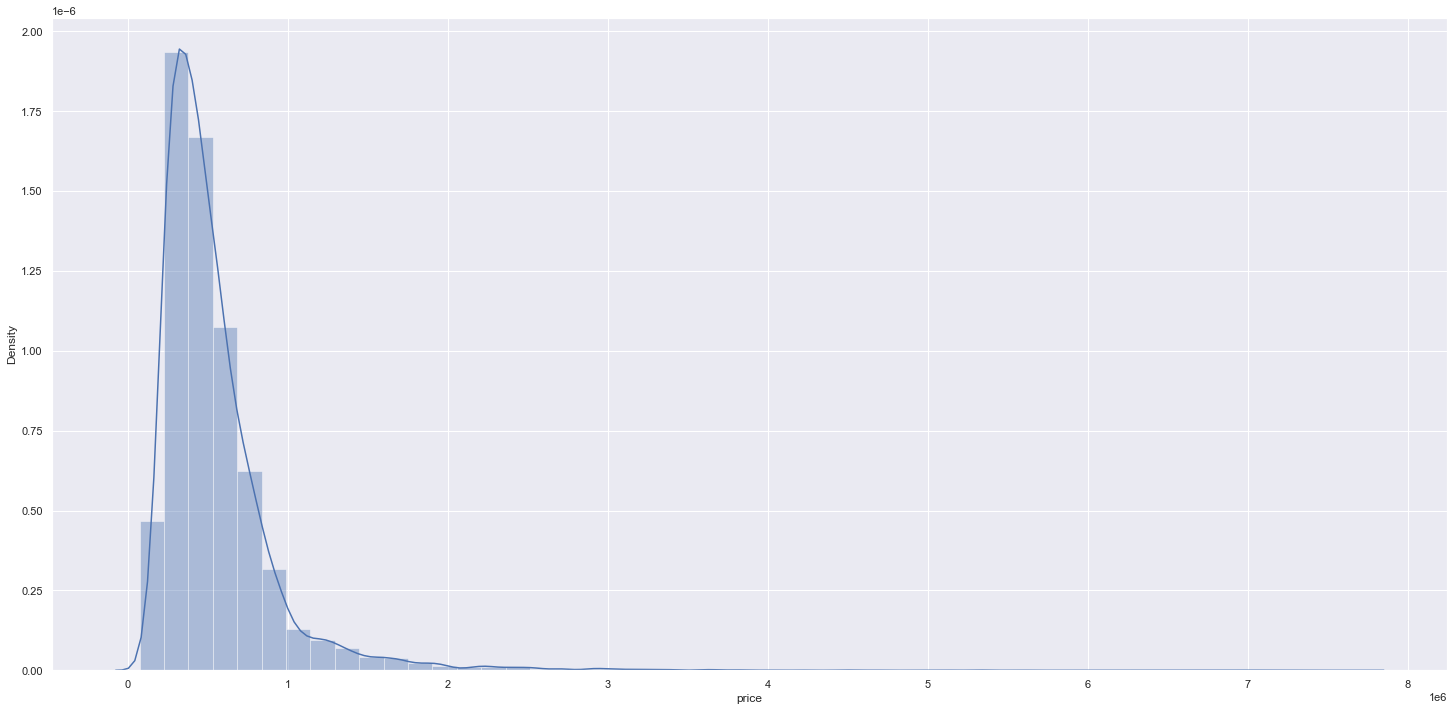

In [146]:
sns.distplot( df4['price'] );

### 4.1.2. Variáveis Numéricas

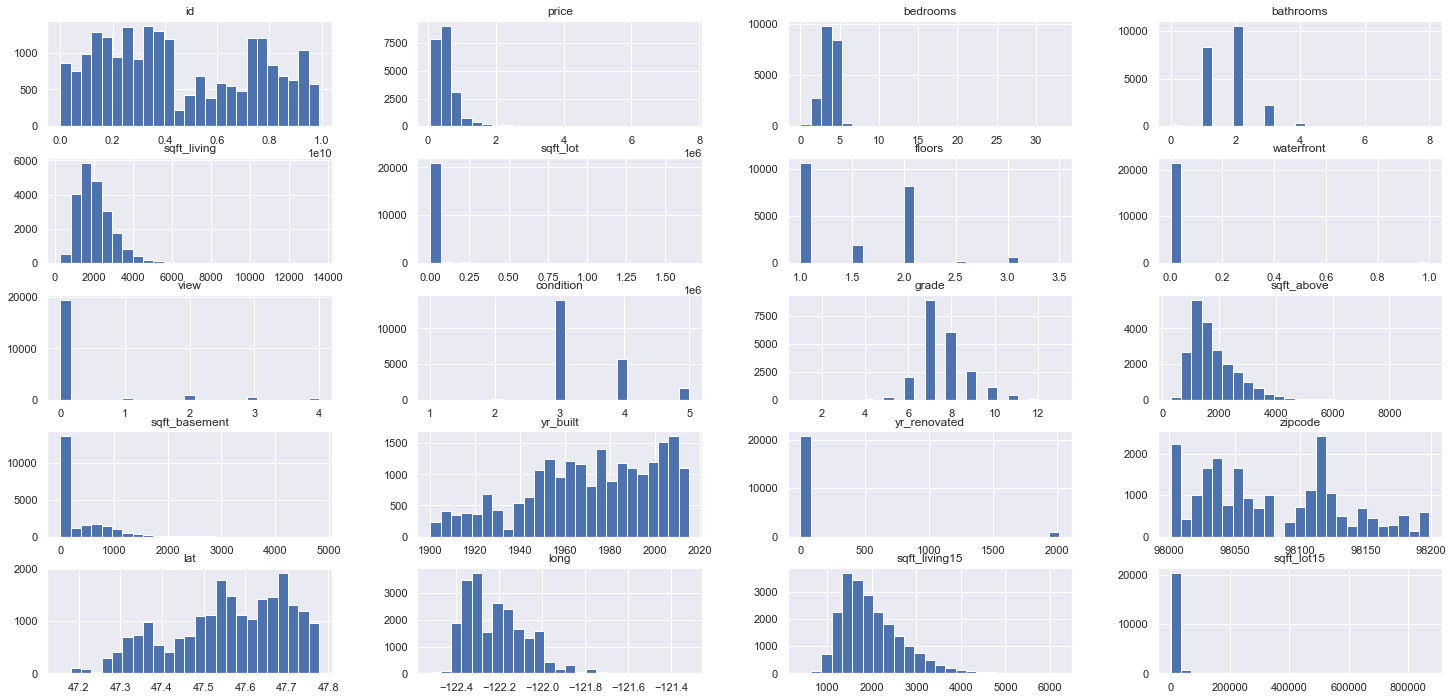

In [147]:
num_atributos.hist( bins=25 );

## 4.2. Análise Bivariada

### **H1.** Imóveis vendem mais ao longo dos anos.
**Falso** Imóveis vendem menos ao longo dos anos.

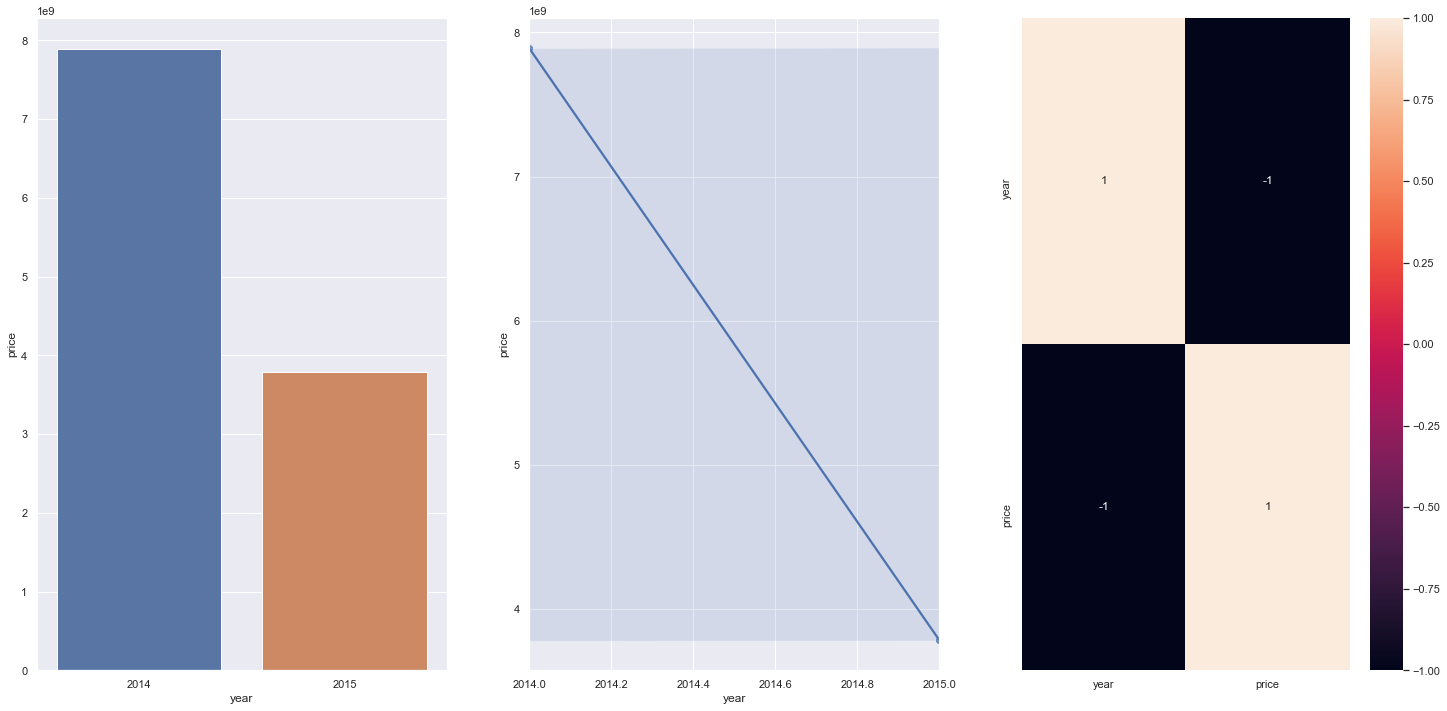

In [148]:
plt.subplot(1, 3, 1)
aux1 = df4[['year', 'price']].groupby('year').sum().reset_index()
sns.barplot(data=aux1, x='year', y='price')

plt.subplot(1, 3, 2)
sns.regplot(data=aux1, x='year', y='price')

plt.subplot(1, 3, 3)
sns.heatmap( aux1.corr( method='pearson'), annot = True );

### **H2.** Imóveis vendem mais no segundo semestre do ano.
**Falso** Imóveis vendem menos no segundo semestre do ano.

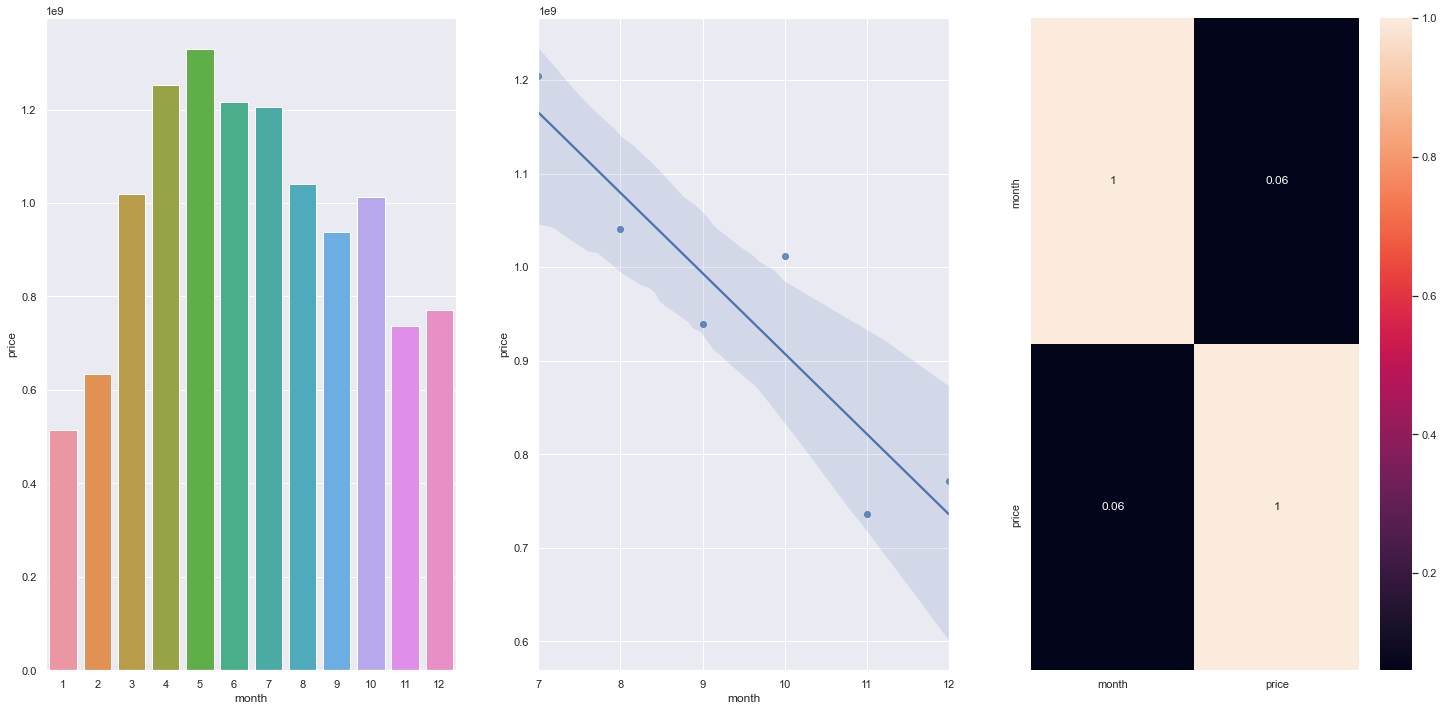

In [149]:
aux1 = df4[['month', 'price']].groupby('month').sum().reset_index()
aux2 = aux1[aux1 > 6]

plt.subplot(1, 3, 1)
sns.barplot( data=aux1, x='month', y='price' )

plt.subplot(1, 3, 2)
sns.regplot( data=aux2, x='month', y='price' )

plt.subplot(1, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

### **H3.** Imóveis vendem mais depois do dia 10 de cada mês.
**Verdadeiro** Imóveis vendem mais depois do dia 10 de cada mês.

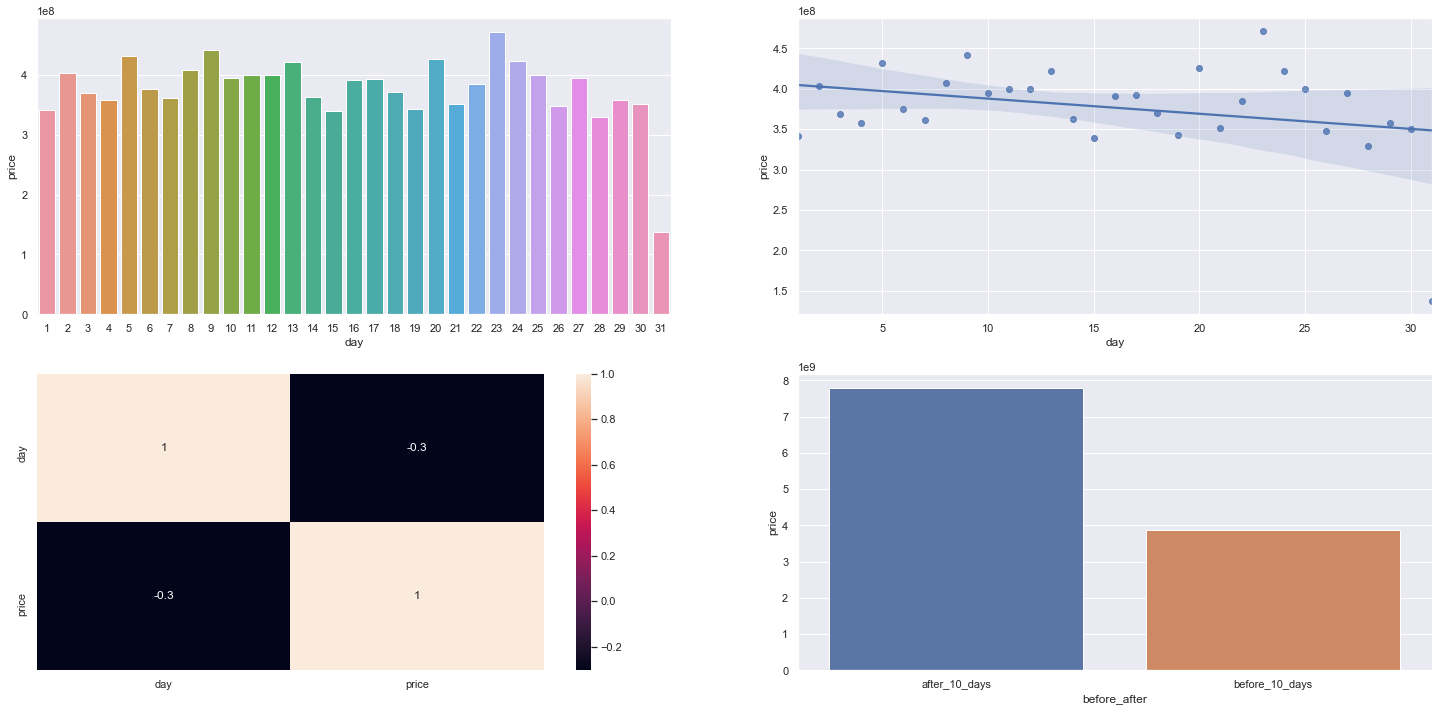

In [150]:
plt.subplot(2,2,1)
aux1 = df4[['day', 'price']].groupby('day').sum().reset_index()
sns.barplot(data=aux1, x='day', y='price')

plt.subplot(2,2,2)
sns.regplot(data=aux1, x='day', y='price')

plt.subplot(2,2,3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

plt.subplot(2,2,4)
aux1['before_after'] = aux1['day'].apply( lambda x: 'before_10_days' if x <= 10 else 'after_10_days')
aux2 = aux1[['before_after', 'price']].groupby('before_after').sum().reset_index()
sns.barplot(data=aux2, x='before_after', y='price');

### **H4.** Imóveis vendem menos aos finais de semana.
**Verdadeiro** Imóveis vendem menos aos finais de semana.

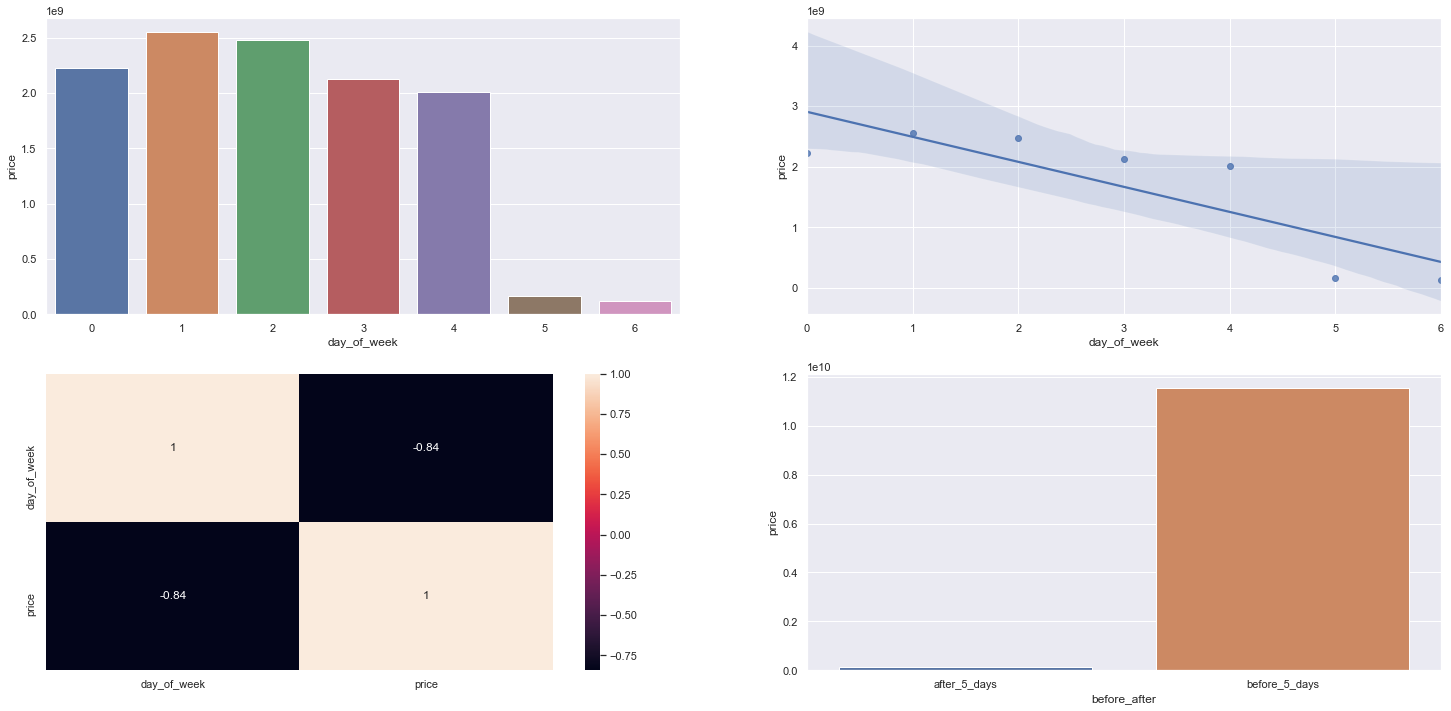

In [151]:
# Observe que o dia da semana começa em 0 -> Segunda-feira
plt.subplot(2,2,1)
aux1 = df4[['day_of_week', 'price']].groupby('day_of_week').sum().reset_index()
sns.barplot(data=aux1, x='day_of_week', y='price')

plt.subplot(2,2,2)
sns.regplot( data=aux1, x='day_of_week', y='price' )

plt.subplot(2,2,3)
sns.heatmap( aux1.corr( method='pearson'), annot=True )

plt.subplot(2,2,4)
aux1['before_after'] = aux1['day_of_week'].apply( lambda x: 'before_5_days' if x <= 5 else 'after_5_days') 
aux2 = aux1[['before_after', 'price']].groupby('before_after').sum().reset_index()
sns.barplot(data=aux2, x='before_after', y='price');

### **H5.** Imóveis com vista para o mar, vendem mais.
**Falso** Imóveis com vista para o mar, vendem menos.

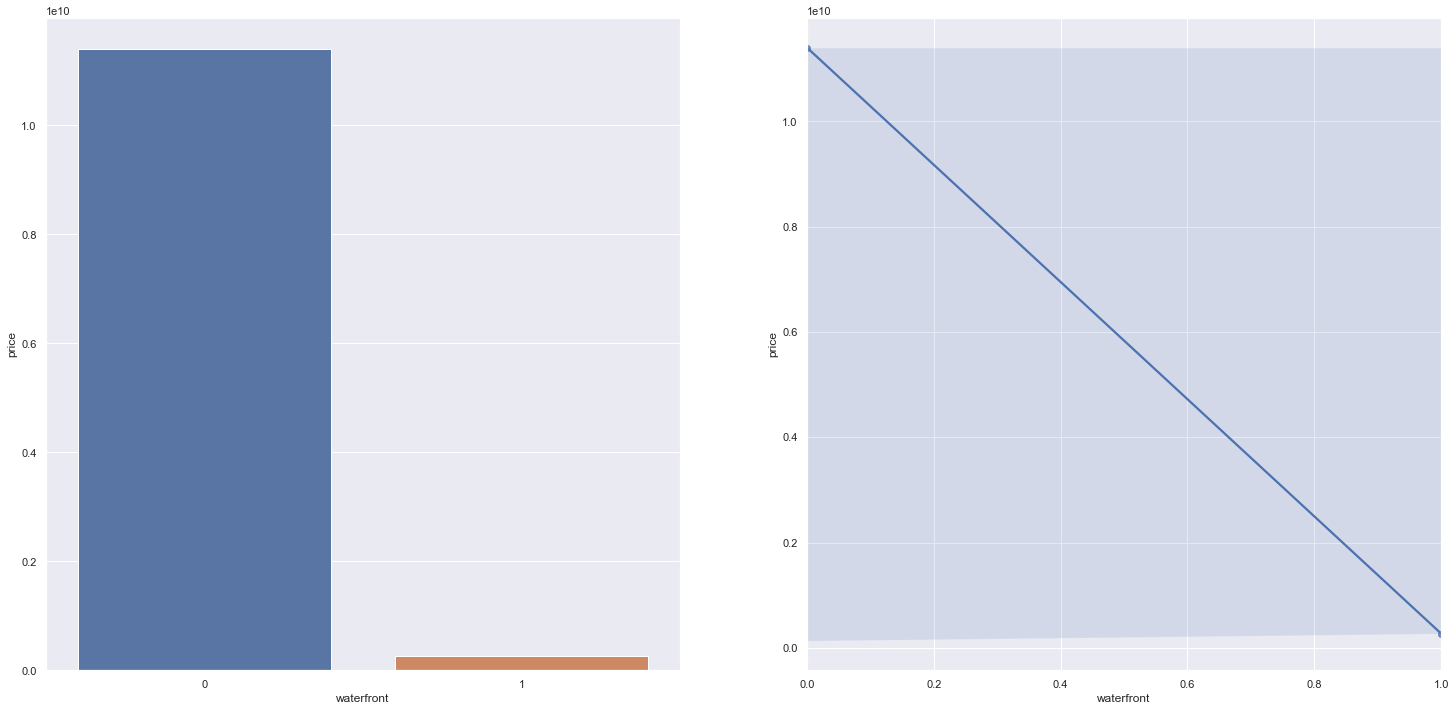

In [152]:
plt.subplot(1,2,1)
aux1 = df4[['waterfront', 'price']].groupby('waterfront').sum().reset_index()
sns.barplot(data=aux1, x='waterfront', y='price')

plt.subplot(1,2,2)
sns.regplot(data=aux1, x='waterfront', y='price');

### **H6.** Imóveis com mais quartos, vendem mais.
**Falso** Imóveis com mais quartos, vendem menos.

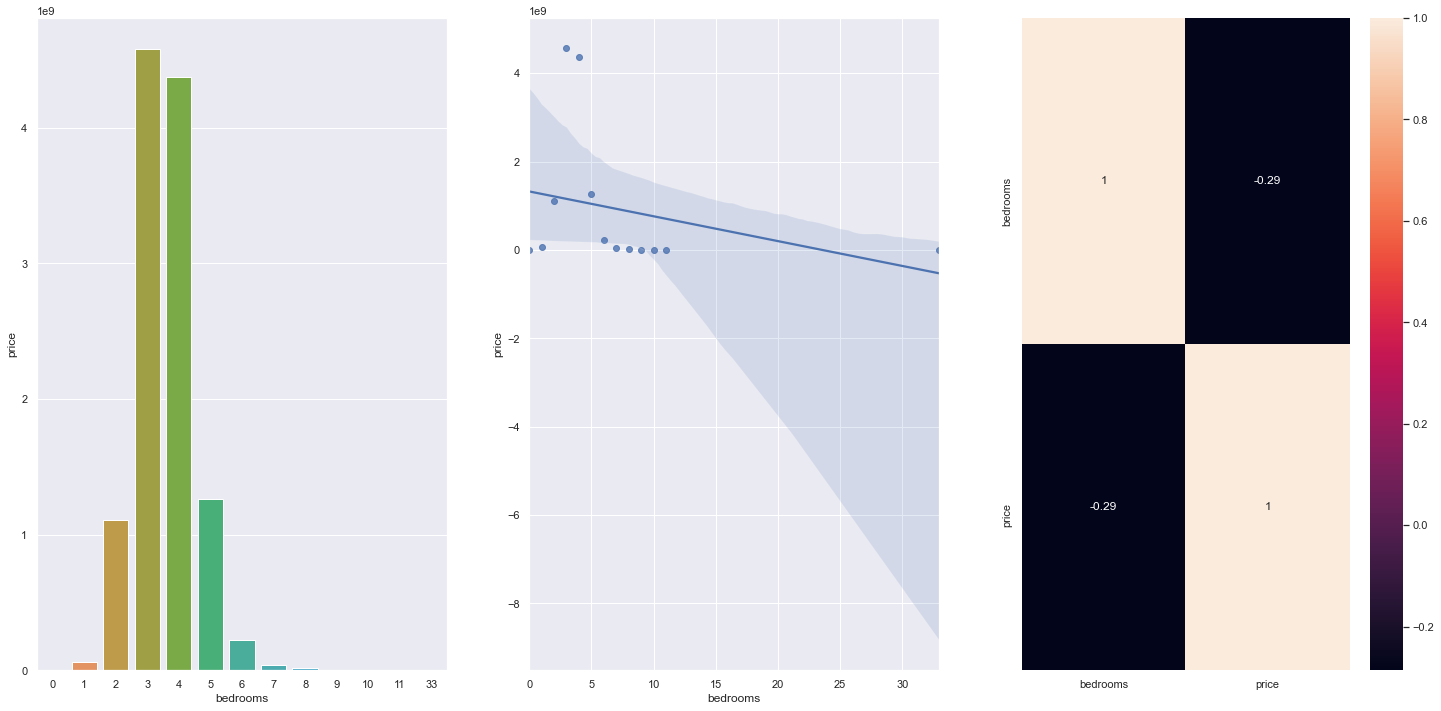

In [153]:
plt.subplot(1,3,1)
aux1 = df4[['bedrooms', 'price']].groupby('bedrooms').sum().reset_index()
sns.barplot(data=aux1, x='bedrooms', y='price')

plt.subplot(1,3,2)
sns.regplot(data=aux1, x='bedrooms', y='price')

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### **H7.** Imóveis com mais andares, vendem mais.
**Falso** Imóveis com mais andares, vendem menos.

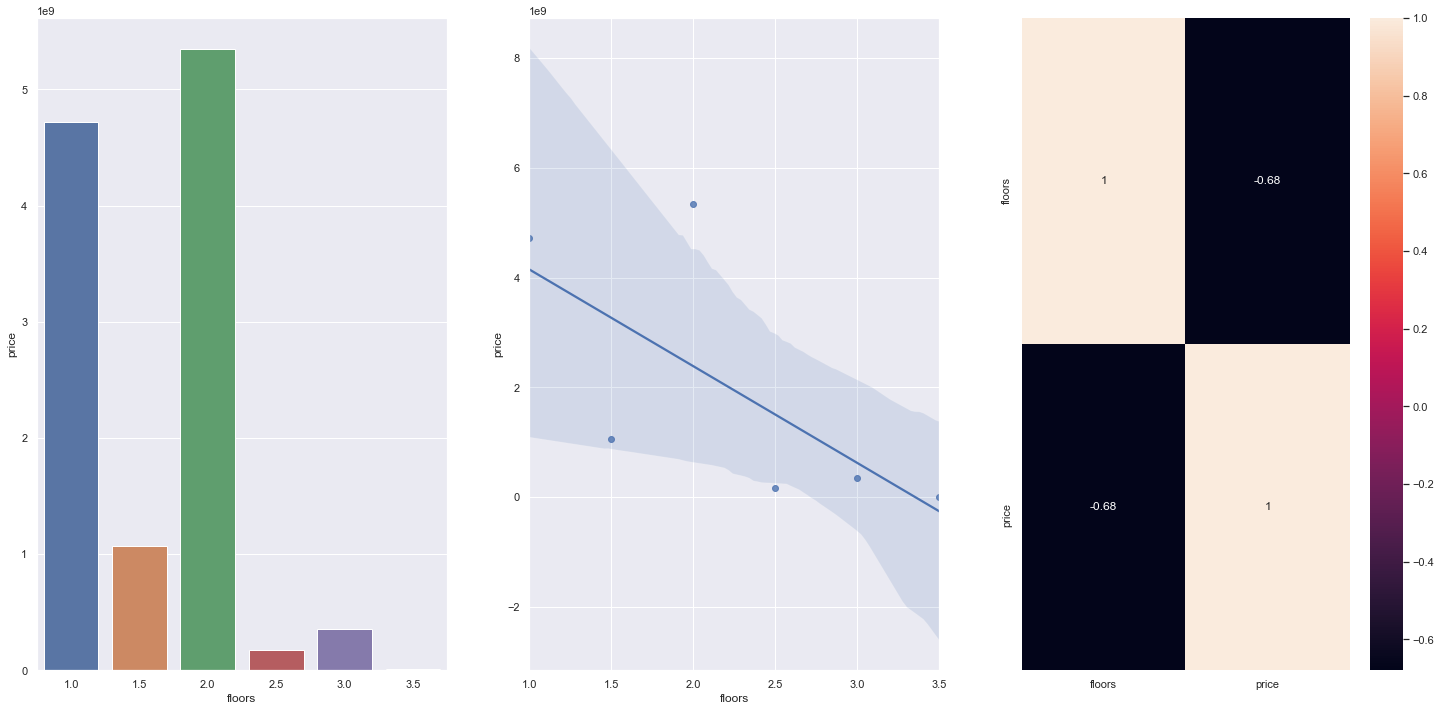

In [154]:
plt.subplot(1,3,1)
aux1 = df4[['floors', 'price']].groupby('floors').sum().reset_index()
sns.barplot( data=aux1, x='floors', y='price')

plt.subplot(1,3,2)
sns.regplot( data=aux1, x='floors', y='price' )

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### **H8.** Imóveis com mais banheiros, vendem mais.
**Falso** Imóveis com mais banheiro, vendem menos.

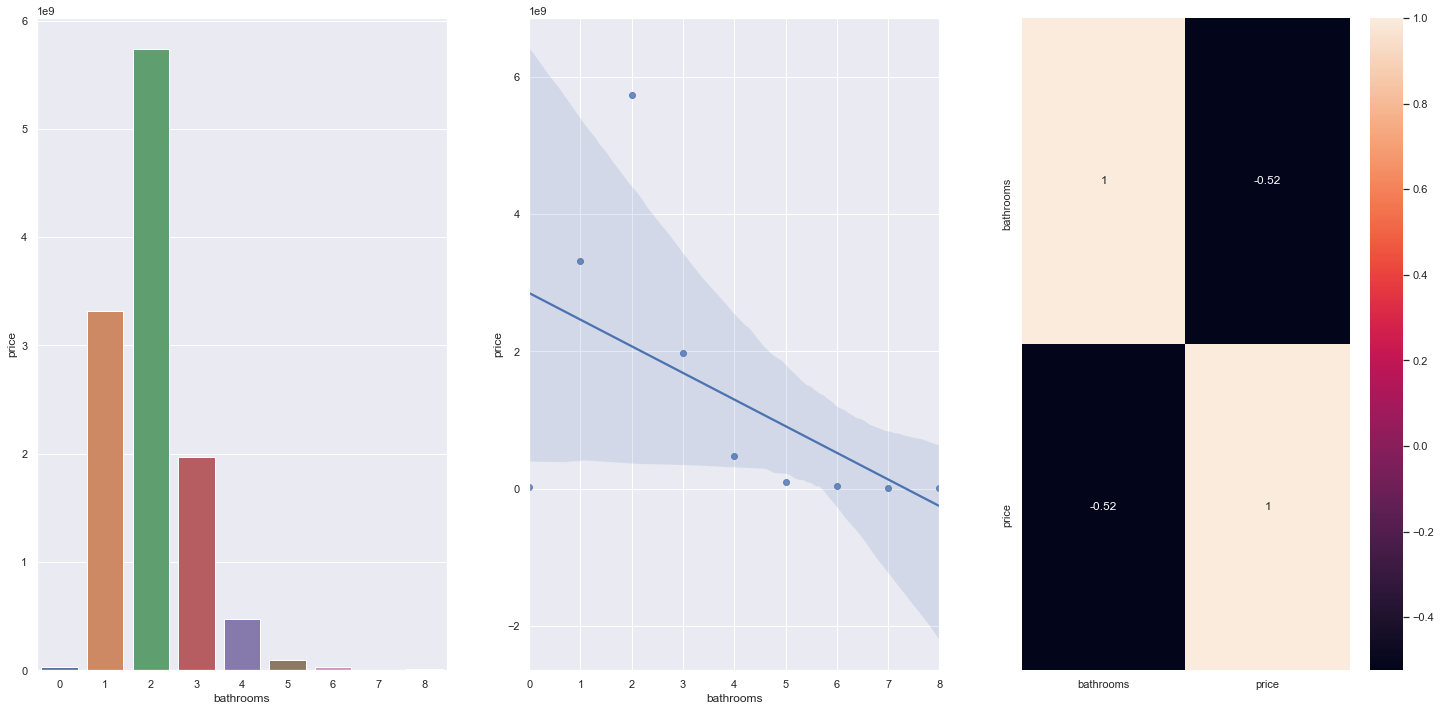

In [156]:
plt.subplot(1, 3, 1)
aux1 = df4[['bathrooms', 'price']].groupby('bathrooms').sum().reset_index()
sns.barplot( data=aux1, x='bathrooms', y='price' )

plt.subplot(1, 3, 2)
sns.regplot( data=aux1, x='bathrooms', y='price' )

plt.subplot(1, 3, 3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### **H9.** Imóveis com melhores condições, vendem mais.
**Verdadeiro** Imóveis com melhores condições, vendem mais.

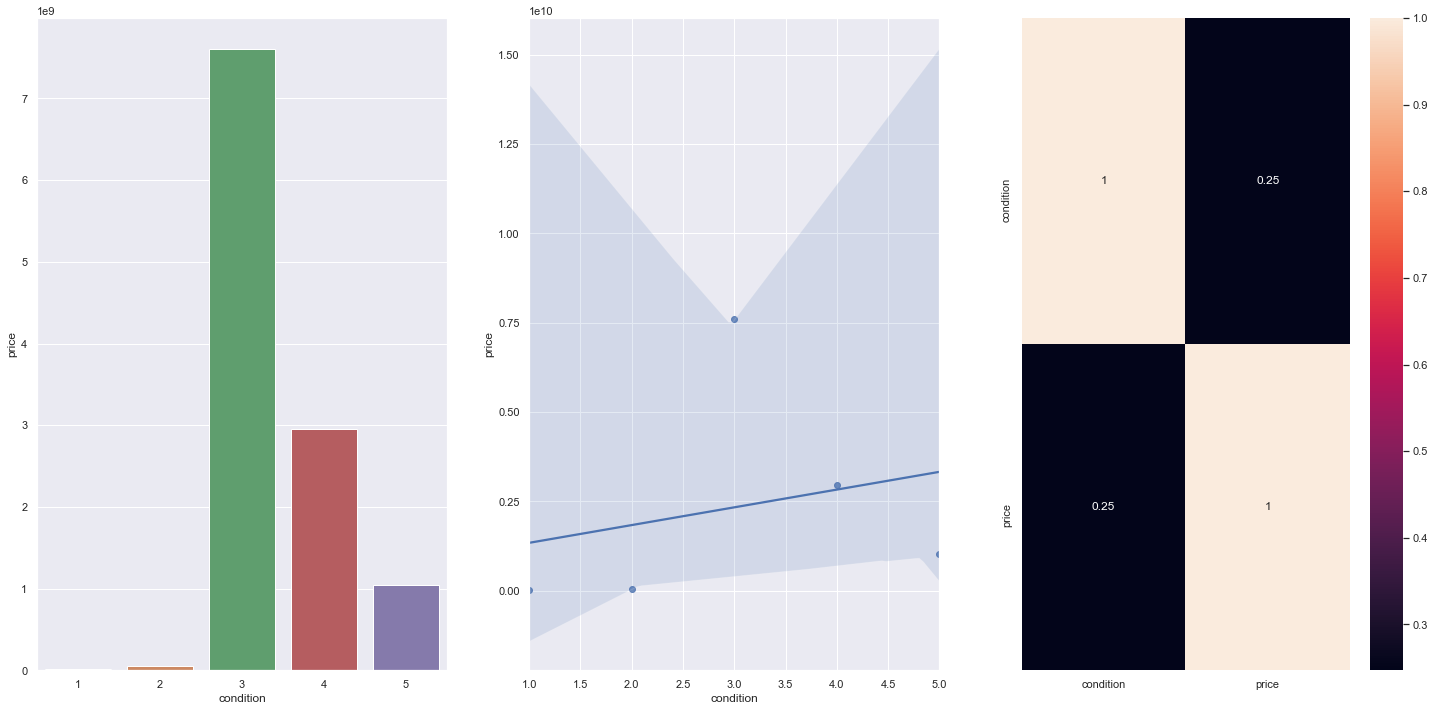

In [162]:
plt.subplot( 1, 3, 1 )
aux1 = df4[['condition', 'price']].groupby('condition').sum().reset_index()
sns.barplot( data=aux1, x='condition', y='price' )

plt.subplot( 1, 3, 2 )
sns.regplot( data=aux1, x='condition', y='price' )

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );


### **H10.** Imóveis com mais metros quadrados, vendem mais.
**Falso** Imóveis com mais metros quadrados, vendem menos.

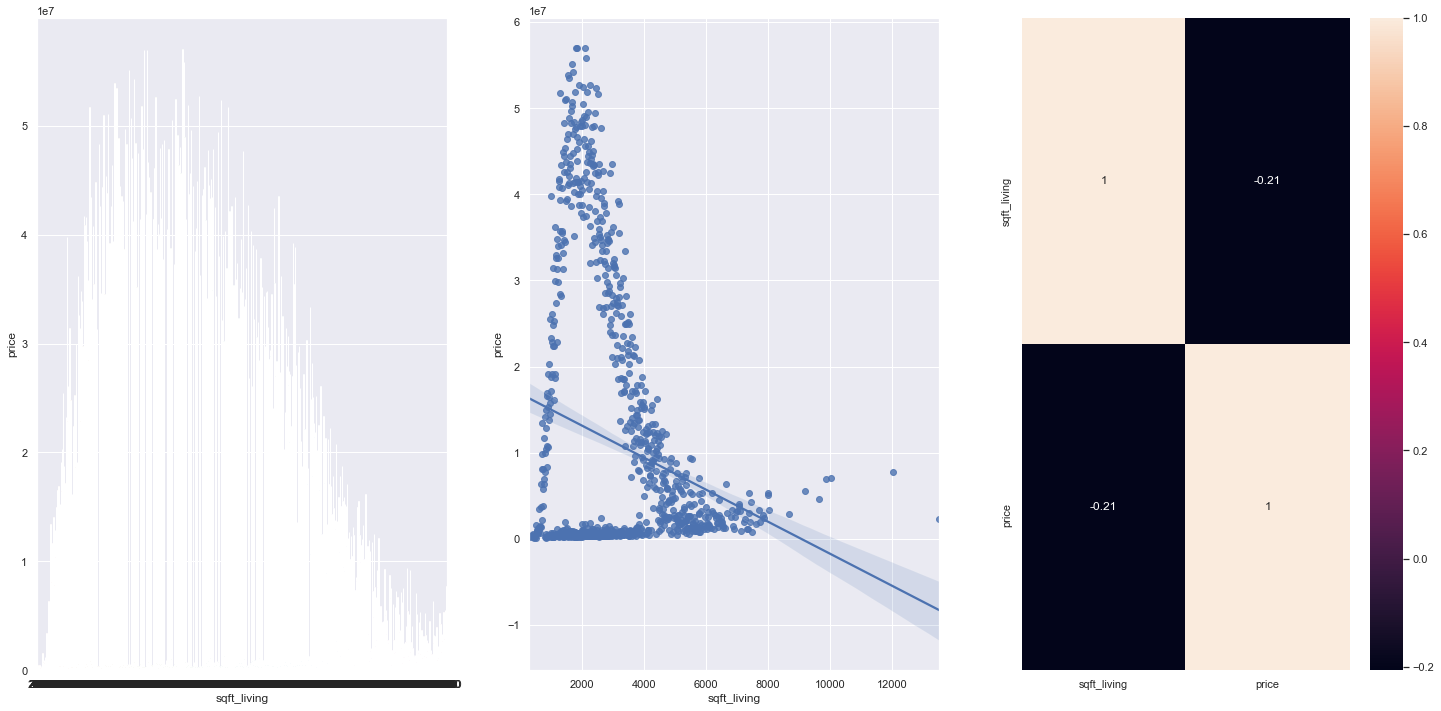

In [168]:
plt.subplot(1,3,1)
aux1 = df4[['sqft_living', 'price']].groupby('sqft_living').sum().reset_index()
sns.barplot(data=aux1, x='sqft_living', y='price')

plt.subplot(1,3,2)
sns.regplot(data=aux1, x='sqft_living', y='price' )

plt.subplot(1,3,3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );